In [ ]:
!pip install bvhio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 11.1 MB/s eta 0:00:00


In [ ]:
import bvhio
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
%matplotlib qt

ImportError: Failed to import any of the following Qt binding modules: PyQt6, PySide6, PyQt5, PySide2

In [ ]:
root = bvhio.readAsHierarchy('sample.bvh')

nframes = len(root.Keyframes)
print("Number of frames:", nframes)

Number of frames: 196


In [ ]:
lshoulder_ = root.filter('LeftShoulder')[0]
larm_ = root.filter('LeftArm')[0]
lforearm_ = root.filter('LeftForeArm')[0]
lhand_ = root.filter('LeftHand')[0]

rshoulder_ = root.filter('RightShoulder')[0]
rarm_ = root.filter('RightArm')[0]
rforearm_ = root.filter('RightForeArm')[0]
rhand_ = root.filter('RightHand')[0]

larm = []
lshoulder = []
lforearm = []
lhand = []

rarm = []
rshoulder = []
rforearm = []
rhand = []


# Leer valores
for i in range(nframes):
    lshoulder_.loadPose(i)
    larm_.loadPose(i)
    lforearm_.loadPose(i)
    lhand_.loadPose(i)

    rshoulder_.loadPose(i)
    rarm_.loadPose(i)
    rforearm_.loadPose(i)
    rhand_.loadPose(i)

    lshoulder.append([lshoulder_.PositionWorld.x, lshoulder_.PositionWorld.y, lshoulder_.PositionWorld.z])
    larm.append([larm_.PositionWorld.x, larm_.PositionWorld.y, larm_.PositionWorld.z])
    lforearm.append([lforearm_.PositionWorld.x, lforearm_.PositionWorld.y, lforearm_.PositionWorld.z])
    lhand.append([lhand_.PositionWorld.x, lhand_.PositionWorld.y, lhand_.PositionWorld.z])

    rshoulder.append([rshoulder_.PositionWorld.x, rshoulder_.PositionWorld.y, rshoulder_.PositionWorld.z])
    rarm.append([rarm_.PositionWorld.x, rarm_.PositionWorld.y, rarm_.PositionWorld.z])
    rforearm.append([rforearm_.PositionWorld.x, rforearm_.PositionWorld.y, rforearm_.PositionWorld.z])
    rhand.append([rhand_.PositionWorld.x, rhand_.PositionWorld.y, rhand_.PositionWorld.z])

lshoulder = np.array(lshoulder)
larm = np.array(larm)
lforearm = np.array(lforearm)
lhand = np.array(lhand)

rshoulder = np.array(rshoulder)
rarm = np.array(rarm)
rforearm = np.array(rforearm)
rhand = np.array(rhand)

In [ ]:
rhand.shape

(196, 3)

In [ ]:
rhand

array([[-0.17583348, -0.05842695,  0.17376725],
       [-0.17381692, -0.07904312,  0.14930183],
       [-0.17086932, -0.09284969,  0.12791868],
       [-0.1623939 , -0.09510164,  0.10436566],
       [-0.16706471, -0.09617212,  0.08671118],
       [-0.17653254, -0.09795713,  0.06048188],
       [-0.18324476, -0.08931524,  0.03664833],
       [-0.19477463, -0.06974331,  0.02848603],
       [-0.18685681, -0.05883266,  0.01421262],
       [-0.18271098, -0.04908548,  0.01828572],
       [-0.18466501, -0.04540151,  0.03401512],
       [-0.18052566, -0.04111502,  0.06236908],
       [-0.17601523, -0.04310235,  0.09150194],
       [-0.1838409 , -0.03614872,  0.14132372],
       [-0.19146378, -0.02398317,  0.18805441],
       [-0.18711364, -0.01674674,  0.23672223],
       [-0.18672909, -0.01162149,  0.28332984],
       [-0.18455175, -0.02052119,  0.30017442],
       [-0.18067278, -0.03693389,  0.297025  ],
       [-0.18018131, -0.04236783,  0.27959022],
       [-0.15897307, -0.03662033,  0.257

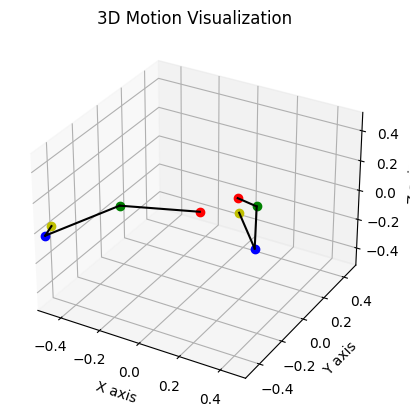

In [ ]:
# Select a specific frame to plot
# frame_number = 10

# Create the figure and the 3D axis
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')


# Para las articulaciones del Robot:

shoulderRobot = np.zeros((nframes,3))
armRobot = np.zeros((nframes,3))
forearmRobot = np.zeros((nframes,3))
handRobot = np.zeros((nframes,3))


for frame_number in range(10):

        Sh = rshoulder[frame_number]
        Ah = rarm[frame_number]
        Fh = rforearm[frame_number]
        Hh = rhand[frame_number]



        # calculamos para el robot
        k1 = 42.5/10.2; k2 = 39.2/25.49; k3 = 9.465/25.49
        Sr = Sh - Sh  # Fijo
        Ar = (Ah-Sh)*k1 + Sr
        Fr = (Fh - Ah)*k2 + Ar
        Hr = (Hh - Fh)*k3 + Fr

        # calculamos para el Robot
        shoulderRobot[frame_number,:] = Sr #Valores en x,y,z
        armRobot[frame_number,:] = Ar #Valores en x,y,z
        forearmRobot[frame_number,:] = Fr
        handRobot[frame_number,:] = Hr

        # Clear the previous frame's data
        ax.cla()


        # EN LUGAR DEL RIGHT ARM PLOTEAREMOS EL DERECHO
        # Plot the data for the selected frame
        ax.plot(lshoulder[frame_number, 0], lshoulder[frame_number, 1], lshoulder[frame_number, 2], label='lshoulder', color='r', marker='o')
        ax.plot(larm[frame_number, 0], larm[frame_number, 1], larm[frame_number, 2], label='larm', color='g', marker='o')
        ax.plot(lforearm[frame_number, 0], lforearm[frame_number, 1], lforearm[frame_number, 2], label='lforearm', color='b', marker='o')
        ax.plot(lhand[frame_number, 0], lhand[frame_number, 1], lhand[frame_number, 2], label='lhand', color='y', marker='o')

        # EN LUGAR DEL RIGHT ARM PLOTEAREMOS EL DEL ROBOT
        ax.plot(Sr[0],Sr[1],Sr[2], label='rshoulder', color='r', marker='o')
        ax.plot(Ar[0],Ar[1],Ar[2], label='rarm', color='g', marker='o')
        ax.plot(Fr[0],Fr[1],Fr[2], label='rforearm', color='b', marker='o')
        ax.plot(Hr[0],Hr[1],Hr[2], label='rhand', color='y', marker='o')

        # Line between lshoulder and larm
        ax.plot([lshoulder[frame_number, 0], larm[frame_number, 0]],
                [lshoulder[frame_number, 1], larm[frame_number, 1]],
                [lshoulder[frame_number, 2], larm[frame_number, 2]], color='k')

        # Line between larm and lforearm
        ax.plot([larm[frame_number, 0], lforearm[frame_number, 0]],
                [larm[frame_number, 1], lforearm[frame_number, 1]],
                [larm[frame_number, 2], lforearm[frame_number, 2]], color='k')

        # Line between lforearm and lhand
        ax.plot([lforearm[frame_number, 0], lhand[frame_number, 0]],
                [lforearm[frame_number, 1], lhand[frame_number, 1]],
                [lforearm[frame_number, 2], lhand[frame_number, 2]], color='k')

        # ---------------------------------- RIGHT (Ahora sera el del Robot)
        # Line between rshoulder and rarm
        ax.plot([Sr[0], Ar[0]],
                [Sr[1], Ar[1]],
                [Sr[2], Ar[2]], color='k')

        # Line between rarm and rforearm
        ax.plot([Ar[0], Fr[0]],
                [Ar[1], Fr[1]],
                [Ar[2], Fr[2]], color='k')

        # Line between rforearm and rhand
        ax.plot([Fr[0], Hr[0]],
                [Fr[1], Hr[1]],
                [Fr[2], Hr[2]], color='k')


        # Set axis labels and limits
        ax.set_xlim([-0.5, 0.5])
        ax.set_ylim([-0.5, 0.5])
        ax.set_zlim([-0.5, 0.5])
        ax.set_xlabel('X axis')
        ax.set_ylabel('Y axis')
        ax.set_zlabel('Z axis')
        ax.set_title('3D Motion Visualization')

        # Add a legend
        #ax.legend()

        # Show the plot
        plt.pause(0.1)

plt.show()

In [ ]:
handRobot


array([[-0.53379031, -0.37085507, -0.0543844 ],
       [-0.52404987, -0.37437495, -0.10357739],
       [-0.52700102, -0.37067797, -0.12821007],
       [-0.52850896, -0.35192377, -0.153122  ],
       [-0.54011112, -0.32623139, -0.17100289],
       [-0.54816438, -0.30362686, -0.21054767],
       [-0.55607768, -0.25900116, -0.24184986],
       [-0.56502334, -0.21963772, -0.26134831],
       [-0.55130321, -0.21022724, -0.29147672],
       [-0.5408691 , -0.20815065, -0.29752684],
       [ 0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.   

In [ ]:
def euclidean_distance(p, q):
    """
    Calculate the Euclidean distance between two vectors of three elements.

    Parameters:
        p (numpy.ndarray): First vector.
        q (numpy.ndarray): Second vector.

    Returns:
        float: Euclidean distance between the two vectors.
    """
    return np.sqrt(np.sum((q - p) ** 2))


# Calculate Euclidean distance
distance1 = euclidean_distance(armRobot[0],shoulderRobot[0])
distance2 = euclidean_distance(armRobot[0],forearmRobot[0])
distance3 =  euclidean_distance(forearmRobot[0],handRobot[0])
print(distance1,distance2,distance3)

NameError: name 'armRobot' is not defined